# Continuous Control

In [12]:
%matplotlib inline

from drl import drl_logger, EPOCH, EPISODE, STEP
from drl.experiment.analyser import Analyzer
from drl.experiment.configuration import Configuration
from drl.experiment.experiment import Experiment
from drl.experiment.config.experiment_config import ExperimentConfig
from drl.experiment.explorer import Explorer
from drl.logging import init_logging, set_logging_level, transform_verbose_count_to_logging_level

In [6]:
init_logging(EPISODE)

## Training Parameters

In [9]:
config = Configuration()
config.set_current_exp_cfg("reacher-multiple-linux")

### Agent

In [16]:
cfg = config.get_current_exp_cfg()

print("Action Size: {}".format(cfg.agent_cfg.action_size))
print("State Size:  {}".format(cfg.agent_cfg.state_size))

Action Size: 4
State Size:  33


### Hyper Parameters 

#### Epoch Configuration

In [18]:
print("Max Steps:            {}".format(cfg.trainer_cfg.max_steps))
print("Max Episode Steps:    {}".format(cfg.trainer_cfg.max_episode_steps))
print("Evaluation Frequency: {}".format(cfg.trainer_cfg.eval_frequency))
print("Evaluation Steps:     {}".format(cfg.trainer_cfg.eval_steps))

Max Steps:            300000
Max Episode Steps:    1000
Evaluation Frequency: 10000
Evaluation Steps:     1000


One Epoch contains:

* number of training episodes = evaluation frequency / max episode steps
* number of validation episoded = evaluatin steps / max episode steps

In [19]:
print("Number of training episodes in epoch:   {}".format(int(cfg.trainer_cfg.eval_frequency/cfg.trainer_cfg.max_episode_steps)))
print("Number of validation episodes in epoch: {}".format(int(cfg.trainer_cfg.eval_steps/cfg.trainer_cfg.max_episode_steps)))

Number of training episodes in epoch:   10
Number of validation episodes in epoch: 1


In [33]:
print("RL Algorithm:         {}".format(cfg.reinforcement_learning_cfg.algorithm_type))
print("Epsilon Start:        {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.epsilon_start))
print("Epsilon End:          {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.epsilon_end))
print("Epsilon Decay:        {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.epsilon_decay))
print("Actor Learning Rate:  {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.lr_actor))
print("Critic Learning Rate: {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.lr_critic))
print("Weight Decay:         {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.weight_decay))

RL Algorithm:         ddpg
Epsilon Start:        1.0
Epsilon End:          0.1
Epsilon Decay:        0.97
Actor Learning Rate:  0.0001
Critic Learning Rate: 0.0003
Weight Decay:         0


#### Neural Network Configuration

In [38]:
print("Actor Hidden Layers Units:  {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.actor_model_cfg.hidden_layers))
print("Critic Hidden Layers Units: {}".format(cfg.reinforcement_learning_cfg.ddpg_cfg.critic_model_cfg.hidden_layers))

Actor Hidden Layers Units:  [256, 128]
Critic Hidden Layers Units: [256, 128]


#### Replay Memory

In [42]:
print("Buffer Size:              {}".format(cfg.replay_memory_cfg.buffer_size))
print("Use Prioritized Replay:   {}".format(cfg.replay_memory_cfg.prioritized_replay))

Buffer Size:              100000
Use Prioritized Replay:   False


## Training

In [43]:
experiment = Experiment(config)

In [44]:
scores = experiment.train()

2020-09-24 06:08:30,574 - drl - INFO - Initializing environment.' - {'name': 'env/unity/linux/reacher-multiple-agent-novis/Reacher.x86_64'}


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


2020-09-24 06:09:56,399 - drl - EPISODE - Train. - {'step': 1000, 'episode': 0, 'epoch': 0, 'epoch_step': 1000, 'epoch_episode': 1, 'episode_step': 999, 'score': '0.472', 'eps': '1.000', 'elapsed': '86s'}


KeyboardInterrupt: 

## Analasys

The project is solved in epoch 32 after playing 1088 episodes.

In [45]:
session_id = experiment.get_session_id()
print("Session ID: {}".format(session_id))

Session ID: reacher-multiple-linux-20200924T0608


In [46]:
session_id = "reacher-multiple-linux-20200923T1900"

analyzer = Analyzer(config, session_id)

In [47]:
experiments = [
    '_experiments/train/reacher-multiple-linux-20200923T1900',
]

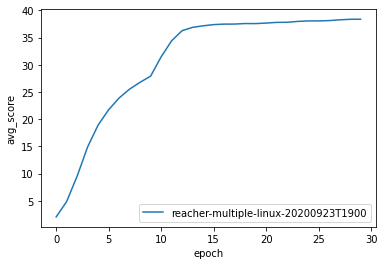

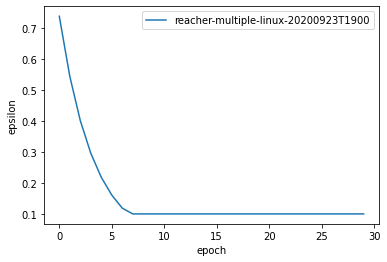

In [48]:
analyzer.compare_train_epoch_cols(experiments, 'avg_score', True)
analyzer.compare_train_epoch_cols(experiments, 'epsilon', True)

## Stored Models

In [49]:
!ls _experiments/train/reacher-multiple-linux-20200923T1900

config.json
episode-log.csv
epoch-log.csv
reachermultiplelinux_current_actor_reacher-multiple-linux-20200923T1900_0_2.06_nan_0.74.pth
reachermultiplelinux_current_actor_reacher-multiple-linux-20200923T1900_10_31.47_nan_0.10.pth
reachermultiplelinux_current_actor_reacher-multiple-linux-20200923T1900_11_34.42_nan_0.10.pth
reachermultiplelinux_current_actor_reacher-multiple-linux-20200923T1900_12_36.28_nan_0.10.pth
reachermultiplelinux_current_actor_reacher-multiple-linux-20200923T1900_13_36.89_nan_0.10.pth
reachermultiplelinux_current_actor_reacher-multiple-linux-20200923T1900_14_37.17_nan_0.10.pth
reachermultiplelinux_current_actor_reacher-multiple-linux-20200923T1900_1_4.88_nan_0.54.pth
reachermultiplelinux_current_actor_reacher-multiple-linux-20200923T1900_15_37.40_nan_0.10.pth
reachermultiplelinux_current_actor_reacher-multiple-linux-20200923T1900_16_37.48_nan_0.10.pth
reachermultiplelinux_current_actor_reacher-multiple-linux-20200923T1900_17_37.49_nan_0.10.pth
reachermultiplelinux_c

## Play With a Trained Agent

In [17]:
scores, mean = experiment.play(
    mode='train', # human, train
    model='_experiments/train/banana-20200812T0605/banana_banana-20200812T0605_58_16.52_16.33_0.01.pth',
    num_episodes=100)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


2020-08-12 07:07:24,896 - unityagents - INFO - 
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [18]:
print("Average score over {} episodes is {}".format(len(scores), mean))

Average score over 100 episodes is 16.51
